In [1]:
import pandas as p
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
df_app = p.read_csv('./data_files/application_record.csv')
df_credit = p.read_csv('./data_files/credit_record.csv')

In [2]:
#credit card application: 
df_app.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
#there are duplicate apllication IDs that must be removed
#we have a total of 438557 ID entries however we only have 438510 unique IDs. must remove the 47 duplicates
df_app.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [5]:
#we are dropping the duplicate ID and keeping the last entry
df_app = df_app.drop_duplicates(['ID'], keep='last')
#we have removed the duplicate aplications with the same IDs 
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
#now we need to fill in the NaN values of Occupation type 
#replacing them with other keyword 
df_app['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)
df_app.info()
#now all entries have value in them

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
#now we can look at the credit card records (need to extract our Classes based on how previous clients used their credit card)
#will have two classes, good clients represented as 0 
#&
#bad clients represented as 1
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [8]:
#Checking if there are any nulls in the credit history, there are none
df_credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

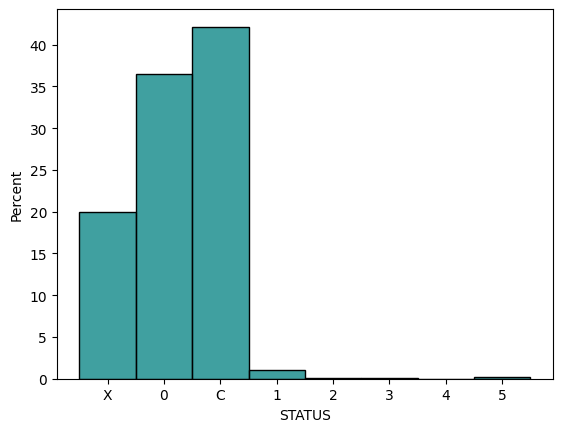

In [9]:
#only those with X, 0, & C are good Clients. the rest are considered bad clients.
#here is a histogram plot representing our clients
#a probem arises: we have an oversampled dataset. we have too many good clients and too few bad clients
sea.histplot(data=df_credit, x="STATUS",stat="percent", color="teal")
df_credit['STATUS'].value_counts()

0    1034381
1      14194
Name: STATUS, dtype: int64

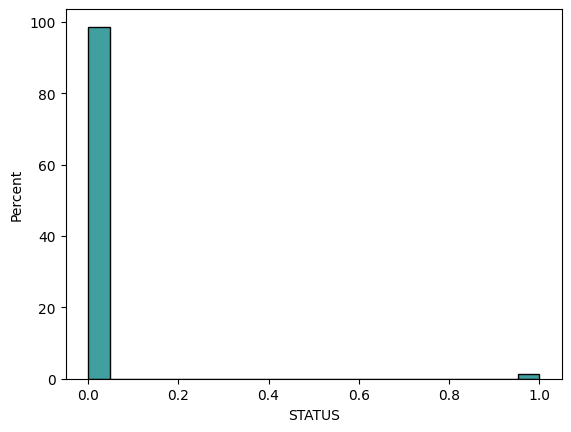

In [10]:
#getting our classifier, X, 0, & C will be acceptable while the other number will be not accepted
df_credit['STATUS'].replace({'C' : 0, 'X' : 0}, inplace=True)
df_credit['STATUS'] = df_credit['STATUS'].astype('int')
#fixed issue here where 1 where going into 0 section
df_credit['STATUS'] = df_credit['STATUS'].apply(lambda x: 1 if x > 0 else 0)
df_credit.nunique()

sea.histplot(data=df_credit, x="STATUS",stat="percent", color="teal")
df_credit['STATUS'].value_counts()

In [11]:
#now we group the row together based on their IDs and keep the clients worst performing month
df_credit_group = df_credit.groupby('ID')['STATUS'].agg(max).reset_index()
df_credit_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      45985 non-null  int64
 1   STATUS  45985 non-null  int64
dtypes: int64(2)
memory usage: 718.6 KB


In [12]:
#extracting the number of months the client has had their credit card
df_credit_date = p.DataFrame(df_credit.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()
df_credit_date['Client length'] = df_credit_date['MONTHS_BALANCE']*-1
df_credit_date.drop(['MONTHS_BALANCE'], axis=1, inplace=True)
df_credit_date['Client length'].describe()

count    45985.000000
mean        26.433489
std         16.481280
min          0.000000
25%         12.000000
50%         25.000000
75%         40.000000
max         60.000000
Name: Client length, dtype: float64

In [13]:
#have an oversampling problem. The model wont have enough examples of bad users to make a differentiation between 0 & 1
#need to use SMOTE
#next step is to group the data & join it with other file
df_credit['STATUS'].value_counts(normalize=True)

0    0.986464
1    0.013536
Name: STATUS, dtype: float64

In [14]:
#grouping df_credit values together 
df_credit_group = df_credit.groupby('ID').agg(max).reset_index()

In [15]:
#Reminder: data is still oversampled
df_credit_group.drop(['MONTHS_BALANCE'], axis=1, inplace=True)

In [16]:
df_credit_group['STATUS'].value_counts(normalize=True)

0    0.883658
1    0.116342
Name: STATUS, dtype: float64

In [17]:
#now merging df_credit_group & df_app based on their IDs
#we now have the classifiers 
df_main = p.merge(df_app, df_credit_group, how='inner', on=['ID'])
#Merging the credit card length as well
df_main = p.merge(df_main, df_credit_date, how='inner', on=['ID'])

#further inspection of data file reveals that records have IDs that are not in application 

df_main.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,Client length
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,1,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,1,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,26


In [18]:
#Reminder we still have an oversampling of good clients vs to bad clients
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [19]:
#df_main will be used to vizualize our real data
#df_main_c will be normalized and prepared to be used in training / testing 
#SMOTE will be used to take care of oversampling
df_main_c = df_main.copy()
df_main_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

Credit card companies can't deny you credit or offer you less favorable terms because of your sex or marital status. The Equal Credit Opportunity Act protects consumers from discrimination when they apply for a credit card.

In [20]:
#droping CODE_GENDER
#will be droping Client Length because that refers to the length of time a client had a credit card
#will be droping NAME_FAMILY_STATUS because its illigale to base credit card approval on marriage status
#will be droping OCCUPATION_TYPE
#will be droping CNT_FAM_MEMBERS & CNT_CHILDREN bacause it doenst effect credit card application
df_main_c.drop(['CODE_GENDER', 'CNT_CHILDREN','NAME_FAMILY_STATUS', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS', 'Client length'], axis=1, inplace=True)
df_main_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   FLAG_OWN_CAR         36457 non-null  object 
 2   FLAG_OWN_REALTY      36457 non-null  object 
 3   AMT_INCOME_TOTAL     36457 non-null  float64
 4   NAME_INCOME_TYPE     36457 non-null  object 
 5   NAME_EDUCATION_TYPE  36457 non-null  object 
 6   NAME_HOUSING_TYPE    36457 non-null  object 
 7   DAYS_BIRTH           36457 non-null  int64  
 8   DAYS_EMPLOYED        36457 non-null  int64  
 9   FLAG_MOBIL           36457 non-null  int64  
 10  FLAG_WORK_PHONE      36457 non-null  int64  
 11  FLAG_PHONE           36457 non-null  int64  
 12  FLAG_EMAIL           36457 non-null  int64  
 13  STATUS               36457 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.2+ MB


Your job pays the bills — but your job title might make some of those bills bigger. Lenders and car insurers look at customers' occupations when setting interest rates and premiums. Although credit,income and debt matter more to lenders, your job gives them clues about your borrowing habits.

It isn't necessary to be employed to get a credit card. However, the Credit CARD Act of 2009 requires card issuers to consider your ability to repay any debt you incur with the account during the application process. In other words, not having a job won't stop you from getting approved, but not having any income might

AMT_INCOME_TOTAL NAME_INCOME_TYPE will be kept you need some income to get approved

In [21]:
df_main_c.head(10)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,STATUS
0,5008804,Y,Y,427500.0,Working,Higher education,Rented apartment,-12005,-4542,1,1,0,0,1
1,5008805,Y,Y,427500.0,Working,Higher education,Rented apartment,-12005,-4542,1,1,0,0,1
2,5008806,Y,Y,112500.0,Working,Secondary / secondary special,House / apartment,-21474,-1134,1,0,0,0,0
3,5008808,N,Y,270000.0,Commercial associate,Secondary / secondary special,House / apartment,-19110,-3051,1,0,1,1,0
4,5008809,N,Y,270000.0,Commercial associate,Secondary / secondary special,House / apartment,-19110,-3051,1,0,1,1,0
5,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,House / apartment,-19110,-3051,1,0,1,1,0
6,5008811,N,Y,270000.0,Commercial associate,Secondary / secondary special,House / apartment,-19110,-3051,1,0,1,1,0
7,5008812,N,Y,283500.0,Pensioner,Higher education,House / apartment,-22464,365243,1,0,0,0,0
8,5008813,N,Y,283500.0,Pensioner,Higher education,House / apartment,-22464,365243,1,0,0,0,0
9,5008814,N,Y,283500.0,Pensioner,Higher education,House / apartment,-22464,365243,1,0,0,0,0


In [22]:
#Normalizing AMT_INCOME_TOTAL


In [23]:
#will be keeping FLAG_OWN_CAR & FLAG_OWN_REALTY  and Normalizing it bacause it shows financial responsibility
df_main_c['FLAG_OWN_CAR'] = df_main_c['FLAG_OWN_CAR'].replace(['Y', 'N'], [1, 0])
df_main_c['FLAG_OWN_REALTY'] = df_main_c['FLAG_OWN_REALTY'].replace(['Y', 'N'], [1, 0])

In [24]:
df_main_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   FLAG_OWN_CAR         36457 non-null  int64  
 2   FLAG_OWN_REALTY      36457 non-null  int64  
 3   AMT_INCOME_TOTAL     36457 non-null  float64
 4   NAME_INCOME_TYPE     36457 non-null  object 
 5   NAME_EDUCATION_TYPE  36457 non-null  object 
 6   NAME_HOUSING_TYPE    36457 non-null  object 
 7   DAYS_BIRTH           36457 non-null  int64  
 8   DAYS_EMPLOYED        36457 non-null  int64  
 9   FLAG_MOBIL           36457 non-null  int64  
 10  FLAG_WORK_PHONE      36457 non-null  int64  
 11  FLAG_PHONE           36457 non-null  int64  
 12  FLAG_EMAIL           36457 non-null  int64  
 13  STATUS               36457 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 4.2+ MB


In [25]:
df_main_c.nunique()

ID                     36457
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
STATUS                     2
dtype: int64

In [26]:
#Normalizing NAME_EDUCATION_TYPE, NAME_HOUSING_TYPE, NAME_INCOME_TYPE  
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_main_c:
    if df_main_c[col].dtypes=='object':
        df_main_c[col] = le.fit_transform(df_main_c[col])

In [27]:
df_main_c.nunique()

ID                     36457
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
STATUS                     2
dtype: int64

In [28]:
df_main_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   FLAG_OWN_CAR         36457 non-null  int64  
 2   FLAG_OWN_REALTY      36457 non-null  int64  
 3   AMT_INCOME_TOTAL     36457 non-null  float64
 4   NAME_INCOME_TYPE     36457 non-null  int32  
 5   NAME_EDUCATION_TYPE  36457 non-null  int32  
 6   NAME_HOUSING_TYPE    36457 non-null  int32  
 7   DAYS_BIRTH           36457 non-null  int64  
 8   DAYS_EMPLOYED        36457 non-null  int64  
 9   FLAG_MOBIL           36457 non-null  int64  
 10  FLAG_WORK_PHONE      36457 non-null  int64  
 11  FLAG_PHONE           36457 non-null  int64  
 12  FLAG_EMAIL           36457 non-null  int64  
 13  STATUS               36457 non-null  int64  
dtypes: float64(1), int32(3), int64(10)
memory usage: 3.8 MB


In [29]:
df_main_c.head(10)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,STATUS
0,5008804,1,1,427500.0,4,1,4,-12005,-4542,1,1,0,0,1
1,5008805,1,1,427500.0,4,1,4,-12005,-4542,1,1,0,0,1
2,5008806,1,1,112500.0,4,4,1,-21474,-1134,1,0,0,0,0
3,5008808,0,1,270000.0,0,4,1,-19110,-3051,1,0,1,1,0
4,5008809,0,1,270000.0,0,4,1,-19110,-3051,1,0,1,1,0
5,5008810,0,1,270000.0,0,4,1,-19110,-3051,1,0,1,1,0
6,5008811,0,1,270000.0,0,4,1,-19110,-3051,1,0,1,1,0
7,5008812,0,1,283500.0,1,1,1,-22464,365243,1,0,0,0,0
8,5008813,0,1,283500.0,1,1,1,-22464,365243,1,0,0,0,0
9,5008814,0,1,283500.0,1,1,1,-22464,365243,1,0,0,0,0


In [30]:
#turning DAYS_BIRTH to age in years & then normalizing between 0 - 1
#you can't get a credit card until you are 18
df_main_c= df_main_c.rename({'DAYS_BIRTH': 'AGE_YEARS', 'DAYS_EMPLOYED' : 'EMPLOYMENT_LENGTH'}, axis=1)

In [31]:
#Normalize between -1 to 1 
#df_main_c['AGE_YEARS']
df_main_c['AGE_YEARS']=-(df_main_c['AGE_YEARS']/365).astype('int')/100
#df_main_c = df_main_c['AGE_YEARS']/100

df_main_c['EMPLOYMENT_LENGTH'] = df_main_c['EMPLOYMENT_LENGTH'].apply(lambda val: int(-(val/365))/100 if val < 0 else 0)

In [32]:
df_main_c.head(10)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE_YEARS,EMPLOYMENT_LENGTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,STATUS
0,5008804,1,1,427500.0,4,1,4,0.32,0.12,1,1,0,0,1
1,5008805,1,1,427500.0,4,1,4,0.32,0.12,1,1,0,0,1
2,5008806,1,1,112500.0,4,4,1,0.58,0.03,1,0,0,0,0
3,5008808,0,1,270000.0,0,4,1,0.52,0.08,1,0,1,1,0
4,5008809,0,1,270000.0,0,4,1,0.52,0.08,1,0,1,1,0
5,5008810,0,1,270000.0,0,4,1,0.52,0.08,1,0,1,1,0
6,5008811,0,1,270000.0,0,4,1,0.52,0.08,1,0,1,1,0
7,5008812,0,1,283500.0,1,1,1,0.61,0.00,1,0,0,0,0
8,5008813,0,1,283500.0,1,1,1,0.61,0.00,1,0,0,0,0
9,5008814,0,1,283500.0,1,1,1,0.61,0.00,1,0,0,0,0


In [33]:
df_main_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   FLAG_OWN_CAR         36457 non-null  int64  
 2   FLAG_OWN_REALTY      36457 non-null  int64  
 3   AMT_INCOME_TOTAL     36457 non-null  float64
 4   NAME_INCOME_TYPE     36457 non-null  int32  
 5   NAME_EDUCATION_TYPE  36457 non-null  int32  
 6   NAME_HOUSING_TYPE    36457 non-null  int32  
 7   AGE_YEARS            36457 non-null  float64
 8   EMPLOYMENT_LENGTH    36457 non-null  float64
 9   FLAG_MOBIL           36457 non-null  int64  
 10  FLAG_WORK_PHONE      36457 non-null  int64  
 11  FLAG_PHONE           36457 non-null  int64  
 12  FLAG_EMAIL           36457 non-null  int64  
 13  STATUS               36457 non-null  int64  
dtypes: float64(3), int32(3), int64(8)
memory usage: 3.8 MB


In [34]:
#Normalizing AMT_INCOME_TOTAL with min max mormalization annual income
#first we rename it to an easier to read column name
df_main_c = df_main_c.rename({'AMT_INCOME_TOTAL' : 'ANNUAL_INCOME'} ,axis=1)

In [35]:
df_main_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   FLAG_OWN_CAR         36457 non-null  int64  
 2   FLAG_OWN_REALTY      36457 non-null  int64  
 3   ANNUAL_INCOME        36457 non-null  float64
 4   NAME_INCOME_TYPE     36457 non-null  int32  
 5   NAME_EDUCATION_TYPE  36457 non-null  int32  
 6   NAME_HOUSING_TYPE    36457 non-null  int32  
 7   AGE_YEARS            36457 non-null  float64
 8   EMPLOYMENT_LENGTH    36457 non-null  float64
 9   FLAG_MOBIL           36457 non-null  int64  
 10  FLAG_WORK_PHONE      36457 non-null  int64  
 11  FLAG_PHONE           36457 non-null  int64  
 12  FLAG_EMAIL           36457 non-null  int64  
 13  STATUS               36457 non-null  int64  
dtypes: float64(3), int32(3), int64(8)
memory usage: 3.8 MB


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_main_c[['ANNUAL_INCOME']] = scaler.fit_transform(df_main_c[['ANNUAL_INCOME']])

In [37]:
df_main_c.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,ANNUAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE_YEARS,EMPLOYMENT_LENGTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,STATUS
0,5008804,1,1,0.258721,4,1,4,0.32,0.12,1,1,0,0,1
1,5008805,1,1,0.258721,4,1,4,0.32,0.12,1,1,0,0,1
2,5008806,1,1,0.055233,4,4,1,0.58,0.03,1,0,0,0,0
3,5008808,0,1,0.156977,0,4,1,0.52,0.08,1,0,1,1,0
4,5008809,0,1,0.156977,0,4,1,0.52,0.08,1,0,1,1,0


In [38]:
df_main_c['ANNUAL_INCOME'].max(axis=0)

1.0

In [39]:
df_main_c['ANNUAL_INCOME'].min(axis=0)

0.0

In [40]:
#rounding the income to 4 decimal places
df_main_c['ANNUAL_INCOME'] = df_main_c['ANNUAL_INCOME'].round(decimals=4)

In [41]:
df_main_c.nunique()

ID                     36457
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
ANNUAL_INCOME            261
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_HOUSING_TYPE          6
AGE_YEARS                 49
EMPLOYMENT_LENGTH         44
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
STATUS                     2
dtype: int64

0    0.8823
1    0.1177
Name: STATUS, dtype: float64

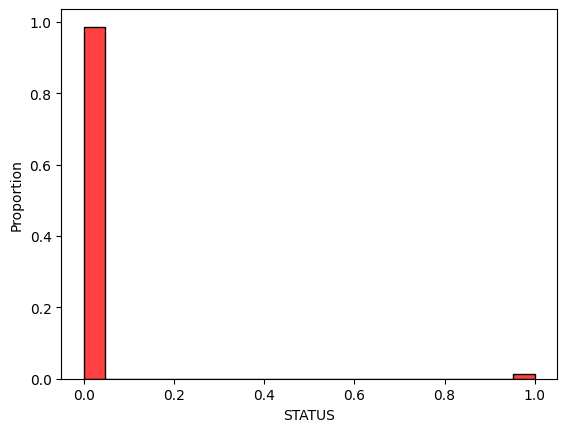

In [42]:
#Now we need to handle the oversampling
#the devide between good and bad clients is to wide
#have to many good clients

sea.histplot(data=df_credit, x="STATUS", stat="proportion", color="red")
df_main_c['STATUS'].value_counts(normalize=True)

In [43]:
#saving the clean data for future use -> STILL NEED TO TAKE CARE OF OVERSAMPLING
#dropping IDs & FLAG_MOBIL because they are not needed. 

df_main_c.drop(['ID', 'FLAG_MOBIL'], axis=1, inplace=True)

df_main_c.to_csv('.\clean_data\creditcard_application_clean_data.csv')

In [44]:
df_main_c.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,ANNUAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE_YEARS,EMPLOYMENT_LENGTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,STATUS
0,5008804,1,1,0.2587,4,1,4,0.32,0.12,1,1,0,0,1
1,5008805,1,1,0.2587,4,1,4,0.32,0.12,1,1,0,0,1
2,5008806,1,1,0.0552,4,4,1,0.58,0.03,1,0,0,0,0
3,5008808,0,1,0.1570,0,4,1,0.52,0.08,1,0,1,1,0
4,5008809,0,1,0.1570,0,4,1,0.52,0.08,1,0,1,1,0


In [45]:
df_main_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   FLAG_OWN_CAR         36457 non-null  int64  
 2   FLAG_OWN_REALTY      36457 non-null  int64  
 3   ANNUAL_INCOME        36457 non-null  float64
 4   NAME_INCOME_TYPE     36457 non-null  int32  
 5   NAME_EDUCATION_TYPE  36457 non-null  int32  
 6   NAME_HOUSING_TYPE    36457 non-null  int32  
 7   AGE_YEARS            36457 non-null  float64
 8   EMPLOYMENT_LENGTH    36457 non-null  float64
 9   FLAG_MOBIL           36457 non-null  int64  
 10  FLAG_WORK_PHONE      36457 non-null  int64  
 11  FLAG_PHONE           36457 non-null  int64  
 12  FLAG_EMAIL           36457 non-null  int64  
 13  STATUS               36457 non-null  int64  
dtypes: float64(3), int32(3), int64(8)
memory usage: 3.8 MB
